In [152]:
import csv

In [153]:
import requests
csv_url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('covid19.csv', 'wb')

csv_file.write(url_content)
csv_file.close()
#with open('covid19.csv', newline='') as f:
#    reader=csv.reader(f)
#    for row in reader:
#        print(row)

In [166]:


with open("covid19.csv","r") as file:
    data=list(csv.reader(file))
#for row in data:
#    print(row[3])

In [167]:
#data #first column province code, second column province name, 

In [168]:
import numpy as np
import matplotlib.pyplot as plt

In [169]:
#data_pr=['10','11','12','13','24','35','46','47','48','59','60','61','62'] #all province codes 


def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

data_pr=Remove(row[0] for row in data)
names_pr=Remove(row[1] for row in data)


prev_date=data[1][3]


#rewrite dates as numbers -> for plotting (from 0 to ..)
        


In [170]:
prev_date

'31-01-2020'

In [171]:
print(data_pr)

['pruid', '35', '59', '1', '24', '48', '47', '46', '13', '10', '12', '11', '61', '62', '60', '99']


In [172]:
print(names_pr)

['prname', 'Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta', 'Saskatchewan', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Prince Edward Island', 'Northwest Territories', 'Nunavut', 'Yukon', 'Repatriated travellers']


In [173]:
del data_pr[0]
del names_pr[0]

In [174]:
num_row=-1
data[1][3]=1
index=1 #index of date: start from 1 ..r eventually will just go o]up by 1 each time
for row in data: #for each row
    num_row=num_row+1 #starts at 0 -> represents row number
    if num_row<2:
        continue #goes back to for loop for row 0 and row 1 (already established)
    date=row[3]
    if int(date[0:2])>= 11 and int(date[3:5])>= 3:  #date just going up by 1 (after march 11th )
        change=int(date[0:2])-int(prev_date[0:2]) 
        if change!=0: #if it changes at all 
            index=index+1 #increase date index by 1
    else:
        change=int(date[0:2])-int(prev_date[0:2]) 
        if change<0:# goign up by a month
            if int(date[3:5])==2:
                change=8 #only once -> jan 31st to feb 8th
            else:
                change=1
        index=index+change #difference between dates
    
    prev_date=date
    row[3]=index #change date 
        
        

In [175]:
print(data_pr)
print(names_pr)
order=[2,3,0,4,1,9,5,6,8,7,-5,-1,-2,-4,-3]
print(order)
data_pr=[data_pr[i] for i in order]
names_ps=[names_pr[i] for i in order]

['35', '59', '1', '24', '48', '47', '46', '13', '10', '12', '11', '61', '62', '60', '99']
['Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta', 'Saskatchewan', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Prince Edward Island', 'Northwest Territories', 'Nunavut', 'Yukon', 'Repatriated travellers']
[2, 3, 0, 4, 1, 9, 5, 6, 8, 7, -5, -1, -2, -4, -3]


In [176]:
names_pr

['Ontario',
 'British Columbia',
 'Canada',
 'Quebec',
 'Alberta',
 'Saskatchewan',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Prince Edward Island',
 'Northwest Territories',
 'Nunavut',
 'Yukon',
 'Repatriated travellers']

In [177]:
data_pr

['35',
 '59',
 '1',
 '24',
 '48',
 '47',
 '46',
 '13',
 '10',
 '12',
 '11',
 '61',
 '62',
 '60',
 '99']

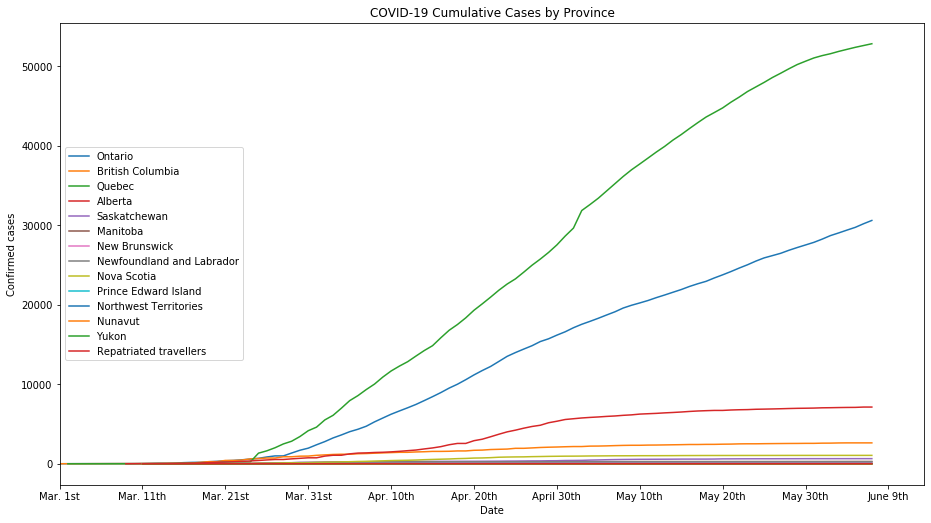

In [178]:
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for i in range(len(data_pr)): #for each provincial code
    if data_pr[i]=='1':
        continue
    x_vec=[] #x axis 
    y_vec=[] #y axis
    for row in data: #for each data row
       # num_row=num_row+1
       # if num_row==0:
       #     continue
        if row[0]==data_pr[i]:
            x_vec.append(row[3]) #append date
            y_vec.append(int(row[4]))
    plt.plot(x_vec,y_vec, label=names_pr[i]) #start at March 1st
plt.xlim(left=30)
#plt.xticks([0,20,40,60,80,100,120], ('Jan. 31st', 'Feb. 20th', 'Mar. 11th', 'Mar. 31st', 'Apr. 20th', 'May 10th','May 30th'))
plt.xticks([30,40,50,60,70,80,90,100,110,120,130], ('Mar. 1st', 'Mar. 11th', 'Mar. 21st', 'Mar. 31st','Apr. 10th', 'Apr. 20th','April 30th', 'May 10th','May 20th','May 30th','June 9th'))
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title('COVID-19 Cumulative Cases by Province')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q2.png', bbox_inches='tight')
# Pandas
#df.myCol.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()        
        
    

In [179]:
#data_pr

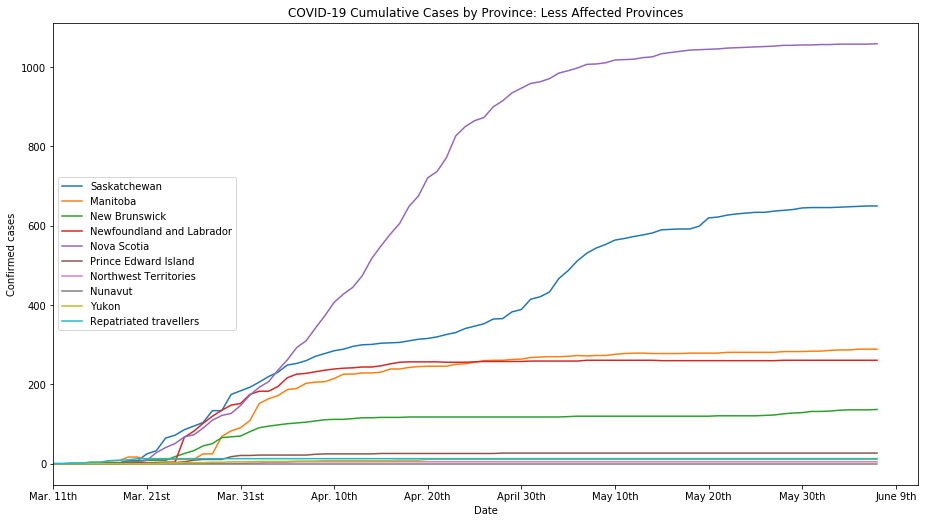

In [180]:
fig=plt.figure()
fig.set_size_inches(15.5, 8.5)
for i in range(len(data_pr)): #for each provincial code
    if data_pr[i]=='1'  or data_pr[i]=='35' or data_pr[i]=='59' or data_pr[i]=='24' or data_pr[i]=='48':#remove data for canada, alberta, BC
        continue
    x_vec=[] #x axis 
    y_vec=[] #y axis
    for row in data: 
        if row[0]==data_pr[i]: #if data is for that province
            x_vec.append(row[3]) #append date
            y_vec.append(int(row[4])) #append cases
    plt.plot(x_vec,y_vec, label=names_pr[i])

plt.xlim(left=40)
#plt.xticks([0,20,40,60,80,100,120], ('Jan. 31st', 'Feb. 20th', 'Mar. 11th', 'Mar. 31st', 'Apr. 20th', 'May 10th','May 30th'))
plt.xticks([40,50,60,70,80,90,100,110,120,130], ('Mar. 11th', 'Mar. 21st', 'Mar. 31st','Apr. 10th', 'Apr. 20th','April 30th', 'May 10th','May 20th','May 30th','June 9th'))       

#plt.xticks([0,20,40,60,80,100,120], ('Jan. 31st', 'Feb. 20th', 'Mar. 11th', 'Mar. 31st', 'Apr. 20th', 'May 10th','May 30th'))
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title('COVID-19 Cumulative Cases by Province: Less Affected Provinces')
plt.legend(loc='center left') #bbox_to_anchor=(1, 0.5))
fig.savefig('Q2lesserprovs.png', bbox_inches='tight')
# Pandas
#df.myCol.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()        
        

In [181]:
data_pr=[int(i) for i in data_pr]
order=np.argsort(data_pr)

[data_pr[i] for i in order]
[names_pr[i] for i in order]

['Canada',
 'Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia',
 'Yukon',
 'Northwest Territories',
 'Nunavut',
 'Repatriated travellers']